### Bisection Method

The **Bisection Method** is a simple and reliable root-finding algorithm that works by repeatedly dividing an interval in half and selecting the subinterval where the function changes sign. 

**Key Steps:**
1. Start with an interval $[a, b]$ where $f(a) \cdot f(b) < 0$ (function changes sign)
2. Compute the midpoint $c = \frac{a + b}{2}$
3. Check if $c$ is the root or if the error is within tolerance
4. If the function changes sign on $[a, c]$, set $b = c$; otherwise set $a = c$
5. Repeat until convergence

**Advantages:** Guaranteed convergence, simple to implement, no derivative needed

**Disadvantages:** Slower convergence than some methods, requires initial bracketing interval

In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
# Bisection Method for Root Finding

def bisection_method(func, low_endpoint, high_endpoint, tolerance, max_iter=100):
    if func(low_endpoint) * func(high_endpoint) >= 0:
        print("Function must have different signs at the endpoints.")
        return None, []

    past = []
    step_count = 1
    root = low_endpoint

    for _ in range(max_iter):
        root = (low_endpoint + high_endpoint) / 2
        past.append(root)

        error = (high_endpoint - low_endpoint) / 2
        if func(root) == 0 or error < tolerance:
            return root, past

        if func(root) * func(low_endpoint) < 0:
            high_endpoint = root
        else:
            low_endpoint = root

        step_count += 1

    return root, past


In [34]:
def draw_graph(function: callable, a_start: float, b_start: float, root: float, history: list, title: str):
  x = np.linspace(a_start - 0.5, b_start + 0.5, 400)
  y = function(x)
  plt.figure(figsize=(10,6))
  plt.plot(x, y, label="Function f(x)", color="blue")
  plt.axhline(0, color="black", linewidth=1)
  y_history = [function(g) for g in history]
  plt.scatter(history, y_history, color="red", label="Root Finding Attempts")
  plt.plot(root, function(root), "go", label=f"Found Root: {root:.5f}")
  plt.title(title)
  plt.legend()
  plt.show()


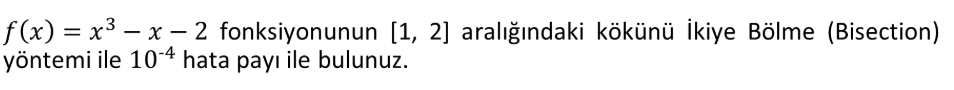

In [35]:
def f1(x):
    return x**3 - x - 2


low_endpoint = 1
high_endpoint = 2
tolerance = 1e-4

root, history = bisection_method(f1, low_endpoint, high_endpoint, tolerance)
print(f"Root approximate root: {root}")
print(f"Total iteration count: {len(history)}")
print(f"History of approximations: {history}")

Root approximate root: 1.52142333984375
Total iteration count: 14
History of approximations: [1.5, 1.75, 1.625, 1.5625, 1.53125, 1.515625, 1.5234375, 1.51953125, 1.521484375, 1.5205078125, 1.52099609375, 1.521240234375, 1.5213623046875, 1.52142333984375]


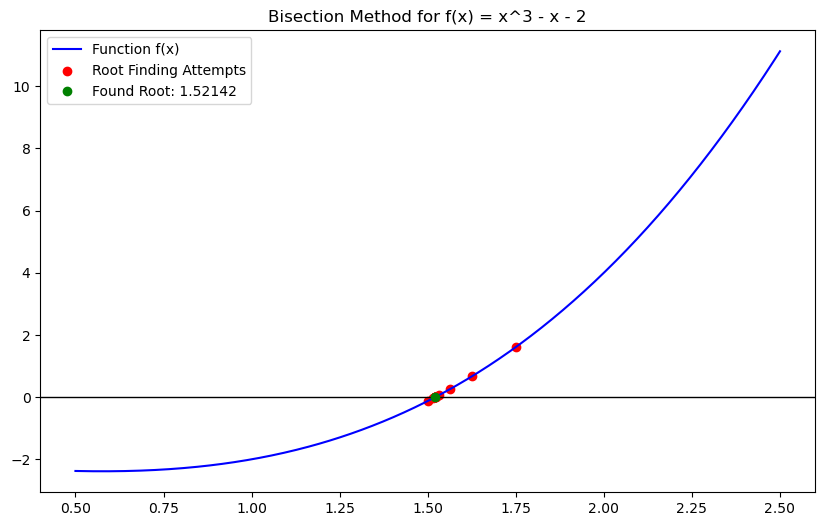

In [36]:
draw_graph(f1, low_endpoint, high_endpoint, root, history, "Bisection Method for f(x) = x^3 - x - 2")

### Regula Falsi Method (False Position Method)

The **Regula Falsi Method** is a root-finding algorithm that uses linear interpolation to find better approximations of roots. It combines features of both the bisection method and secant method.

**Key Steps:**
1. Start with an interval $[a, b]$ where $f(a) \cdot f(b) < 0$ (function changes sign)
2. Compute the false position (interpolated point):
   $\displaystyle c = \frac{a\,f(b) - b\,f(a)}{f(b) - f(a)}$
3. Check if $c$ is the root or if the error is within tolerance
4. If the function changes sign on $[a, c]$, set $b = c$; otherwise set $a = c$
5. Repeat until convergence

**Advantages:** Faster convergence than bisection, uses actual function values, guaranteed convergence for bracketing method

**Disadvantages:** Can be slower than Newton's method, may converge slowly for certain function shapes, requires initial bracketing interval

In [37]:
def regula_falsi_method(func: callable, low_endpoint: float, high_endpoint: float, tolerance: float, max_iter: int = 100):
    if func(low_endpoint) * func(high_endpoint) >= 0:
        print("Function must have different signs at the endpoints.")
        return None, []

    past = []
    step_count = 1

    print(f"{'Step':<20} {'Low Endpoint (a):':<20} {'High Endpoint (b)':<20} {'New Root (c)':<20} {'f(c)':<20}")

    root = low_endpoint

    for _ in range(max_iter):
        root = (low_endpoint * func(high_endpoint) - high_endpoint *
                func(low_endpoint)) / (func(high_endpoint) - func(low_endpoint))
        past.append(root)

        print(f"{step_count:<20} {low_endpoint:<20.10f} {high_endpoint:<20.10f} {root:<20.10f} {func(root):<20.10f}")

        error = abs(func(root))
        if error < tolerance:
            return root, past

        if func(root) * func(low_endpoint) < 0:
            high_endpoint = root
        else:
            low_endpoint = root

        step_count += 1

    return root, past

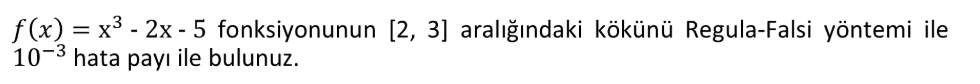

In [38]:
def f2(x):
    return x**3 - 2*x - 5

low_endpoint = 2
high_endpoint = 3
tolerance = 1e-3

root, history = regula_falsi_method(f2, low_endpoint, high_endpoint, tolerance)
print(f"Root approximate root: {root}")
print(f"Total iteration count: {len(history)}")
print(f"History of approximations: {history}")

Step                 Low Endpoint (a):    High Endpoint (b)    New Root (c)         f(c)                
1                    2.0000000000         3.0000000000         2.0588235294         -0.3907999186       
2                    2.0588235294         3.0000000000         2.0812636598         -0.1472040596       
3                    2.0812636598         3.0000000000         2.0896392101         -0.0546765033       
4                    2.0896392101         3.0000000000         2.0927395743         -0.0202028663       
5                    2.0927395743         3.0000000000         2.0938837085         -0.0074505059       
6                    2.0938837085         3.0000000000         2.0943054511         -0.0027456728       
7                    2.0943054511         3.0000000000         2.0944608458         -0.0010115739       
8                    2.0944608458         3.0000000000         2.0945180934         -0.0003726528       
Root approximate root: 2.0945180933857572
Total iterati

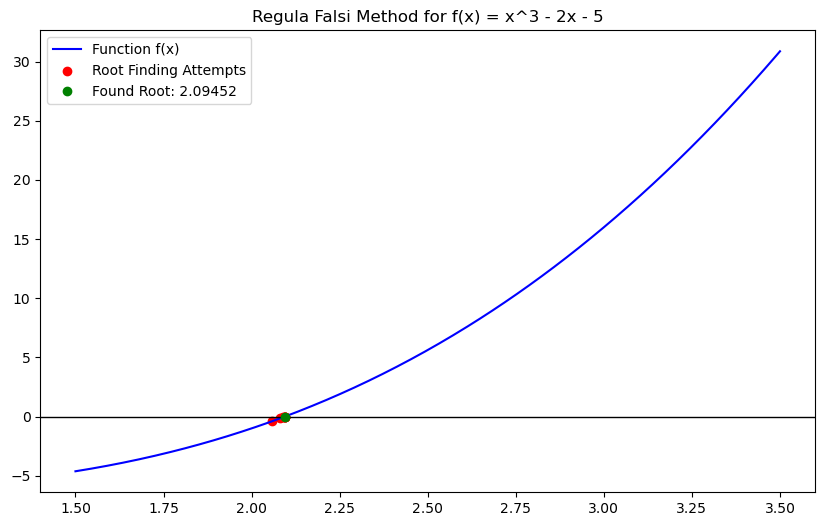

In [39]:
draw_graph(f2, low_endpoint, high_endpoint, root, history, "Regula Falsi Method for f(x) = x^3 - 2x - 5")

### Fixed Point Iteration (Fixed Point Method)

Fixed point iteration rewrites the root problem $f(x)=0$ as $x = g(x)$ and iteratively applies $x_{n+1} = g(x_n)$ to converge to a fixed point that is also a root of $f$.

**Key Steps:**
1. Choose a transformation $g(x)$ and an initial guess $x_0$.
2. Iterate $x_{n+1} = g(x_n)$.
3. Stop when the approximate error $|x_{n+1} - x_n|$ is below tolerance or when a maximum iteration count is reached.

**Convergence Notes:**
- Converges if $|g'(x)| < 1$ near the fixed point (locally contractive).
- Diverges or oscillates if $|g'(x)| \ge 1$ near the fixed point.

**Pros:** Simple to implement; no derivative of $f$ required (only $g$ evaluation).

**Cons:** Sensitive to the choice of $g(x)$ and initial guess; can converge slowly or diverge if the contractive condition fails.

In [40]:
def fixed_point_method(g_function, initial_guess, tolerance, max_iterations):
  history = [initial_guess]
  x_prev = initial_guess
  step = 1
  print(f"{'Step':<20} {'x_prev':<20} {'x_new (g(x))':<20} {'Error':<20}")
  print("-"*80)
  while step <= max_iterations:
    x_new = g_function(x_prev)
    history.append(x_new)
    error = abs(x_new - x_prev)
    print(f"{step:<20} {x_prev:<20} {x_new:<20} {error:<20}")
    if error < tolerance:
      return x_new, history
    x_prev = x_new
    step += 1
  print("Maximum iterations reached")
  return x_new, history



In [41]:
def plot_cobweb(g_function, start, root, history, title):
    min_x = min(min(history), start, root) - 0.5
    max_x = max(max(history), start, root) + 0.5
    x_space = np.linspace(min_x, max_x, 400)
    y_g = g_function(x_space)
    y_x = x_space
    plt.plot(x_space, y_g, label='g(x) curve', color='blue', linewidth=2)
    plt.plot(x_space, y_x, label='y = x line', color='red', linestyle='--', linewidth=2)
    x_curr = history[0]
    for i in range(len(history)-1):
        x_next = history[i+1]
        plt.plot([x_curr, x_curr], [x_curr, x_next], 'g-', alpha=0.5)
        plt.plot([x_curr, x_next], [x_next, x_next], 'g-', alpha=0.5)
        x_curr = x_next
    plt.plot(start, g_function(start), 'yo', label='Start', markersize=8, markeredgecolor='black')
    plt.plot(root, root, 'ro', label=f'Found root: {root:.5f}', markersize=10, markeredgecolor='black', zorder=10)
    plt.title(title)
    plt.legend()
    plt.show()


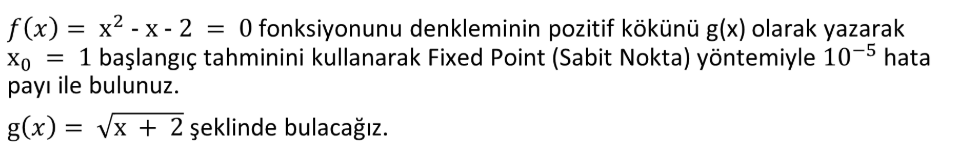

Step                 x_prev               x_new (g(x))         Error               
--------------------------------------------------------------------------------
1                    1                    1.7320508075688772   0.7320508075688772  
2                    1.7320508075688772   1.9318516525781366   0.19980084500925943 
3                    1.9318516525781366   1.9828897227476208   0.05103807016948414 
4                    1.9828897227476208   1.995717846477207    0.012828123729586194
5                    1.995717846477207    1.9989291749527314   0.003211328475524411
6                    1.9989291749527314   1.9997322758191236   0.0008031008663922368
7                    1.9997322758191236   1.9999330678348022   0.00020079201567857474
8                    1.9999330678348022   1.9999832668887012   5.0199053899024904e-05
9                    1.9999832668887012   1.9999958167178002   1.254982909904001e-05
10                   1.9999958167178002   1.9999989541791767   3.13746137

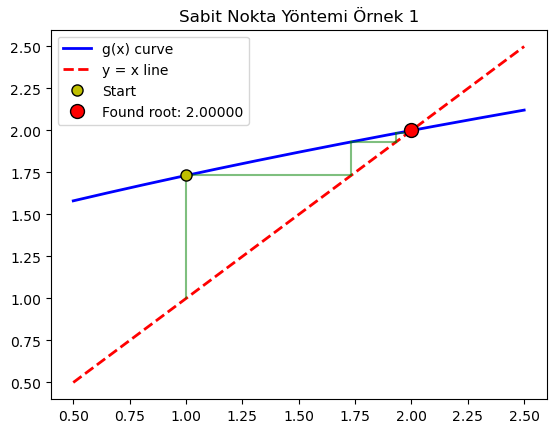

In [42]:
def f4(x):
  return np.sqrt(x+2)
start = 1
tolerance = 1e-5
root, past = fixed_point_method(f4, start, tolerance, 100)
print("Sonuç:", root)
print("Toplam iterasyon : ", len(past))
plot_cobweb(f4, start, root, past, "Sabit Nokta Yöntemi Örnek 1")